In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('Train_heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,280,58,Female,Cleveland,asymptomatic,130.0,197.0,False,normal,131.0,False,0.6,flat,0.0,normal,0.0
1,452,54,Male,Hungary,atypical angina,110.0,208.0,False,normal,142.0,False,0.0,NaN,NaN,NaN,0.0
2,40,61,Male,Cleveland,non-anginal,150.0,243.0,True,normal,137.0,True,1.0,flat,0.0,normal,0.0
3,558,44,Male,Hungary,asymptomatic,130.0,290.0,False,normal,100.0,True,2.0,flat,NaN,NaN,1.0
4,549,54,Male,Hungary,asymptomatic,200.0,198.0,False,normal,142.0,True,2.0,flat,NaN,NaN,1.0


In [ ]:
df['num'].value_counts()

,count
num,
0.0,213
1.0,142
3.0,61
2.0,53
4.0,12


# **Data Cleaning**

---



**Handling NA values**

In [ ]:
df.isna().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,46
chol,24
fbs,68
restecg,2
thalch,43


In [ ]:
df.drop(['id'], axis = 1, inplace = True)

In [ ]:
#get the percentage of na values
all_data_count = np.prod(df.shape)
perc = (df.isna().sum().sum()/all_data_count)*100
print('NA values percentage:', perc)

NA values percentage: 14.676328502415458


In [ ]:
#drop na values
dropped_na = df.dropna()
print('rowws before dropping na:', len(df))
print('rows after dropping na:', len(dropped_na))

rowws before dropping na: 690
rows after dropping na: 159


In [ ]:
nanum1 = df['ca'].isna().sum()
print('na in ca:', nanum1)

nanum2 = df['thal'].isna().sum()
print('na in thal:', nanum2)

na in ca: 450
na in thal: 356


In [ ]:
df.dtypes

,0
age,int64
sex,object
dataset,object
cp,object
trestbps,float64
chol,float64
fbs,object
restecg,object
thalch,float64
exang,object


cleaning ca

In [ ]:
#get na values percentage
ca_na_perc = (df['ca'].isna().sum()/len(df))*100
print('na percentage:', ca_na_perc)

na percentage: 65.21739130434783


In [ ]:
#since most of the values in ca are na, we will drop it
df.drop(['ca'], axis = 1, inplace = True)

cleaning thal

In [ ]:
#get na values percentage
thal_na_perc = (df['thal'].isna().sum()/len(df))*100
print('na percentage:', thal_na_perc)

na percentage: 51.59420289855072


In [ ]:
#half of the values in thal are missing, so we will drop it
df.drop(['thal'], axis = 1, inplace = True)

In [ ]:
#get the percentage of na values
all_data_count = np.prod(df.shape)
perc = (df.isna().sum().sum()/all_data_count)*100
print('NA values percentage:', perc)

#drop na values
dropped_na = df.dropna()
print('rowws before dropping na:', len(df))
print('rows after dropping na:', len(dropped_na))

NA values percentage: 7.948717948717948
rowws before dropping na: 690
rows after dropping na: 272


we still need momre cleaning, so let's clean slope and num

slope

In [ ]:
df['slope'].value_counts()

,count
slope,
flat,264
upsloping,152
downsloping,46


In [ ]:
#get na values percentage
slope_na_perc = (df['slope'].isna().sum()/len(df))*100
print('na percentage:', slope_na_perc)

na percentage: 33.04347826086956


In [ ]:
# use .map to turn them to numbers for the model to understand later
df['slope'] = df['slope'].map({
    'flat': 0,
    'upsloping': 1,
    'downsloping': 2,
})

# since the slope is categorical, i will use the mode to handle na values
mode = df['slope'].mode()[0]
df['slope'].fillna(mode, inplace = True)

#we can change this and use random sampling instead to not make the df biased to flat

<ipython-input-17-c2611024481a>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['slope'].fillna(mode, inplace = True)


num

In [ ]:
#get the percentage of na values
all_data_count = np.prod(df.shape)
perc = (df.isna().sum().sum()/all_data_count)*100
print('NA values percentage:', perc)

#drop na values
dropped_na = df.dropna()
print('rowws before dropping na:', len(df))
print('rows after dropping na:', len(dropped_na))

NA values percentage: 5.406911928651059
rowws before dropping na: 690
rows after dropping na: 381


num will be handles after label-encoding

**Label Encoding**

In [ ]:
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,num
0,58,Female,Cleveland,asymptomatic,130.0,197.0,False,normal,131.0,False,0.6,0.0,0.0
1,54,Male,Hungary,atypical angina,110.0,208.0,False,normal,142.0,False,0.0,0.0,0.0
2,61,Male,Cleveland,non-anginal,150.0,243.0,True,normal,137.0,True,1.0,0.0,0.0
3,44,Male,Hungary,asymptomatic,130.0,290.0,False,normal,100.0,True,2.0,0.0,1.0
4,54,Male,Hungary,asymptomatic,200.0,198.0,False,normal,142.0,True,2.0,0.0,1.0


the columns that need label encodig are sex, dataset, cp, fps, restecg and exang

In [ ]:
label_encoder = LabelEncoder()

columns = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang'] # already encoded slope using .map

for column in columns:
    df[column] = label_encoder.fit_transform(df[column])

df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,num
0,58,0,0,0,130.0,197.0,0,1,131.0,0,0.6,0.0,0.0
1,54,1,1,1,110.0,208.0,0,1,142.0,0,0.0,0.0,0.0
2,61,1,0,2,150.0,243.0,1,1,137.0,1,1.0,0.0,0.0
3,44,1,1,0,130.0,290.0,0,1,100.0,1,2.0,0.0,1.0
4,54,1,1,0,200.0,198.0,0,1,142.0,1,2.0,0.0,1.0


In [ ]:
# use the mean of the other feature to fill na values

df['trestbps'].fillna(df['trestbps'].mean(), inplace=True)
df['thalch'].fillna(df['thalch'].mean(), inplace=True)
df['oldpeak'].fillna(df['oldpeak'].mean(), inplace=True)
df['chol'].fillna(df['chol'].mean(), inplace=True)

df.isna().sum()

<ipython-input-21-b9eaaf4caf96>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['trestbps'].fillna(df['trestbps'].mean(), inplace=True)
<ipython-input-21-b9eaaf4caf96>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0


here we should handle the na values in num by using clustering techniques

In [ ]:
# Get all numerical features (except 'num' since it's the target of clustering)
numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

# Encoded categorical features (after label encoding)
categorical_features = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope']

# Final feature list (numerical + encoded categorical)
clustering_features = numerical_features + categorical_features

df_missing = df[df['num'].isna()]
df_complete = df.dropna(subset=['num'])

**K-means Clustering**

In [ ]:
df_kmeans = df.copy()

from sklearn.cluster import KMeans

# Apply K-Means clustering with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df_complete['cluster'] = kmeans.fit_predict(df_complete[clustering_features])

# Predict clusters for missing values
df_missing['cluster'] = kmeans.predict(df_missing[clustering_features])

# Fill missing values using mode
df_missing['num'] = df_missing['cluster'].map(
    df_complete.groupby('cluster')['num'].agg(lambda x: x.mode()[0])
)

# Store changes in the original dataset
df_kmeans.update(df_missing)

df_kmeans['cluster'] = None  # reset column
df_kmeans.update(df_complete[['cluster']])
df_kmeans.update(df_missing[['cluster']])

<ipython-input-23-399349ab334b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_complete['cluster'] = kmeans.fit_predict(df_complete[clustering_features])
<ipython-input-23-399349ab334b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_missing['cluster'] = kmeans.predict(df_missing[clustering_features])
<ipython-input-23-399349ab334b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

**Spectral Clustering**

In [ ]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np

df_spectral = df.copy()

# Compute pairwise distance matrix
distance_matrix = euclidean_distances(df_complete[clustering_features])

# Apply Spectral Clustering
spectral = SpectralClustering(n_clusters=5, affinity='nearest_neighbors', random_state=42)
df_complete['cluster'] = spectral.fit_predict(distance_matrix)

# Assign missing values based on nearest cluster
missing_distances = euclidean_distances(df_missing[clustering_features], df_complete[clustering_features])

# Assign missing values to the cluster of the nearest neighbor
df_missing['cluster'] = df_complete.iloc[np.argmin(missing_distances, axis=1)]['cluster'].values

# Fill missing values with cluster mode
df_missing['num'] = df_missing['cluster'].map(
    df_complete.groupby('cluster')['num'].agg(lambda x: x.mode()[0])
)

# Store changes in Spectral Clustering copy
df_spectral.update(df_missing)

# Merge clusters back into full dataset copy
df_spectral['cluster'] = None  # reset column
df_spectral.update(df_complete[['cluster']])
df_spectral.update(df_missing[['cluster']])


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_spectral.py:703: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
<ipython-input-24-64471c2316df>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_complete['cluster'] = spectral.fit_predict(distance_matrix)
<ipython-input-24-64471c2316df>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

**Fuzzy C-Means Clustering**

In [ ]:
!pip install -q scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import skfuzzy as fuzz

df_fuzzy = df.copy()

# Convert data into numpy array
data = df_complete[clustering_features].values.T

# Apply Fuzzy C-Means clustering with 5 clusters
n_clusters = 5
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(data, n_clusters, m=2, error=0.005, maxiter=1000)

# Assign cluster labels to complete data based on highest membership probability
df_complete['cluster'] = np.argmax(u, axis=0)

# Predict membership for missing values
df_missing_scaled = df_missing[clustering_features].values.T  # Ensure same format as training
u_missing = fuzz.cluster.cmeans_predict(df_missing_scaled, cntr, m=2, error=0.005, maxiter=1000)[0]

# Assign missing values to the most probable cluster
df_missing['cluster'] = np.argmax(u_missing, axis=0)

df_missing['num'] = df_missing['cluster'].map(
    df_complete.groupby('cluster')['num'].agg(lambda x: x.mean())
)

# Store changes in Fuzzy C-Means copy
df_fuzzy.update(df_missing)

df_fuzzy['cluster'] = None # reset column
df_fuzzy.update(df_complete[['cluster']])
df_fuzzy.update(df_missing[['cluster']])


<ipython-input-26-30a5befbb5e7>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_complete['cluster'] = np.argmax(u, axis=0)
<ipython-input-26-30a5befbb5e7>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_missing['cluster'] = np.argmax(u_missing, axis=0)
<ipython-input-26-30a5befbb5e7>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [ ]:
from sklearn.metrics import silhouette_score

# Function to get silhouette score
def compute_silhouette(df_clustered, clustering_features):
    if 'cluster' not in df_clustered:
        print("Error: 'cluster' column missing in DataFrame")
        return None

    labels = df_clustered['cluster'].dropna()  # Drop NaNs to avoid errors
    data = df_clustered.loc[df_clustered['cluster'].notna(), clustering_features]

    return silhouette_score(data, labels)

# Compute scores
silhouette_kmeans = compute_silhouette(df_kmeans, clustering_features)
silhouette_spectral = compute_silhouette(df_spectral, clustering_features)
silhouette_fuzzy = compute_silhouette(df_fuzzy, clustering_features)

# Store results in a dataframe
silhouette_scores = pd.DataFrame({
    'Clustering Method': ['K-Means', 'Spectral Clustering', 'Fuzzy C-Means'],
    'Silhouette Score': [silhouette_kmeans, silhouette_spectral, silhouette_fuzzy]
})

# Find the best clustering method
best_method = silhouette_scores.loc[silhouette_scores['Silhouette Score'].idxmax(), 'Clustering Method']

print(silhouette_scores)
print(f"\n Based on the highest Silhouette Score, the best clustering method is {best_method}.")


     Clustering Method  Silhouette Score
0              K-Means          0.359279
1  Spectral Clustering          0.334214
2        Fuzzy C-Means          0.336568

 Based on the highest Silhouette Score, the best clustering method is K-Means.


In [ ]:
#since kmeans had the best silhouette score, we will use it
df.update(df_kmeans[['num']])

df.isnull().sum()


,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0


**Outliers detection**




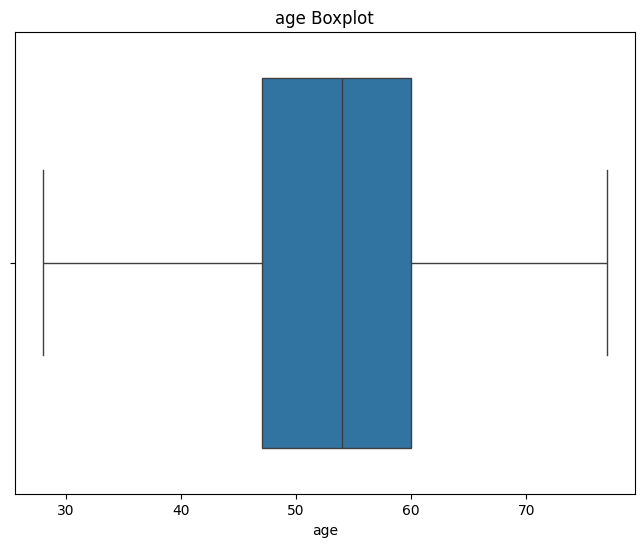

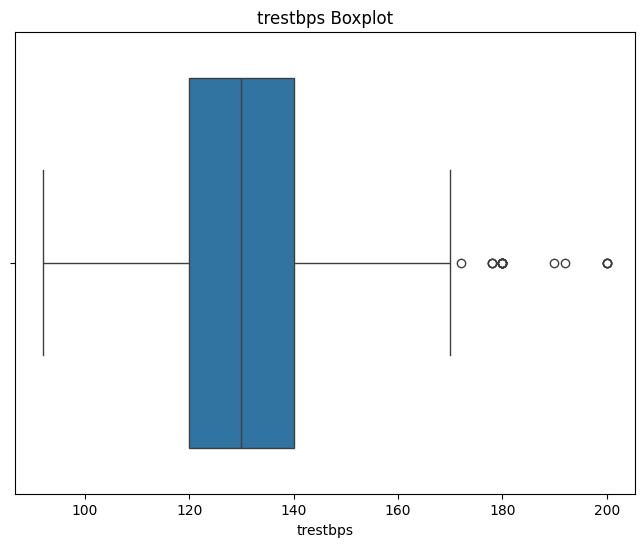

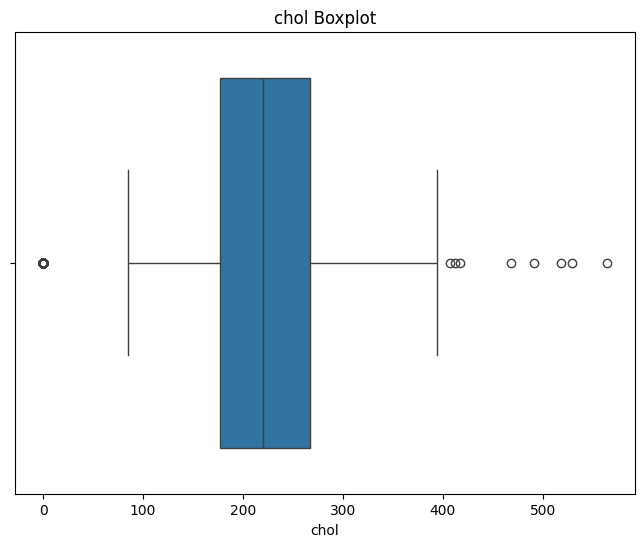

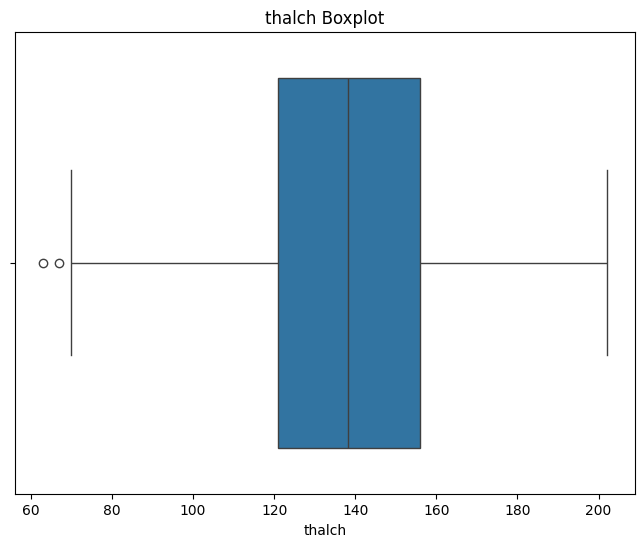

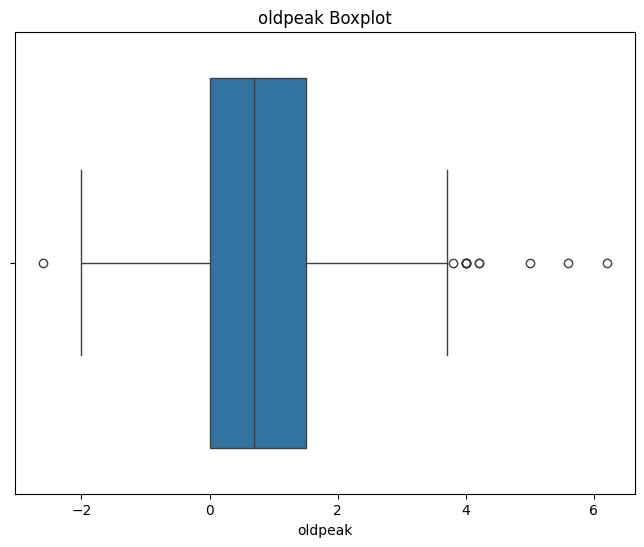

In [ ]:
import seaborn as sns
# Outlier detection using IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

numerical_features = ['age', 'trestbps', 'chol', 'thalch','oldpeak']  #not including the columns that got label encoded
for feature in numerical_features:
    outliers = detect_outliers_iqr(df[feature])

# Visualization
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[feature])
    plt.title(f"{feature} Boxplot")
    plt.show()


In [ ]:
#remove rows with outlieers
for feature in numerical_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

len(df)


527

**standardization**

In [ ]:
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [ ]:
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,num
0,0.568327,0,0,0,-0.067218,-0.862854,0,1,-0.461039,0,-0.234586,0.0,0.0
1,0.144394,1,1,1,-1.383605,-0.641014,0,1,-0.000989,0,-0.875004,0.0,0.0
2,0.886276,1,0,2,1.249170,0.064841,1,1,-0.210103,1,0.192360,0.0,0.0
3,-0.915437,1,1,0,-0.067218,1.012703,0,1,-1.757543,1,1.259725,0.0,1.0
5,-0.491504,0,0,2,-0.067218,0.710194,0,1,-0.126458,0,-0.661531,1.0,0.0


# **Models Testing**

---



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error

In [ ]:
x = df.drop('num', axis=1)
y = df['num']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**Ada-Boost**

In [ ]:
ada_boost_model = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)

ada_boost_model.fit(x_train, y_train)

y_pred = ada_boost_model.predict(x_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Mean Square Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))


Accuracy: 0.6698113207547169
Mean Square Error: 1.1320754716981132
Mean Absolute Error: 0.5283018867924528


**Gradient Descent-based Models (we need to work on them more. these here are probably wrong)**

**keras**

In [ ]:
# Import TensorFlow and necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD


# Define the Neural Network Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),  # Input Layer
    Dense(32, activation='relu'),  # Hidden Layer
    Dense(5, activation='softmax')  # Output Layer
])

# Compile Model with Stochastic Gradient Descent
model.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train Model
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

# Make Predictions
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)  # Convert probabilities to class labels

# Compute MSE and MAE
mse = mean_squared_error(y_test, y_pred_classes)
mae = mean_absolute_error(y_test, y_pred_classes)

print('Accuracy:', accuracy_score(y_test, y_pred_classes))
print('Mean Square Error:', mse)
print('Mean Absolute Error:', mae)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.2360 - loss: 1.6527 - val_accuracy: 0.6698 - val_loss: 1.1194
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6712 - loss: 1.0170 - val_accuracy: 0.6604 - val_loss: 0.9873
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6423 - loss: 0.9408 - val_accuracy: 0.6509 - val_loss: 0.9290
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6741 - loss: 0.8512 - val_accuracy: 0.6509 - val_loss: 0.9251
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7158 - loss: 0.7772 - val_accuracy: 0.6321 - val_loss: 0.9169
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6782 - loss: 0.8302 - val_accuracy: 0.6226 - val_loss: 0.9229
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7213 - loss: 0.7836 - val_accuracy: 0.6132 - val_loss: 0.9245
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6973 - loss: 0.8257 - val_accuracy: 0.6226 - v

**Gradient Boost**

In [ ]:

gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(x_train, y_train)

y_pred = gb_model.predict(x_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Mean Square Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))


Accuracy: 0.5660377358490566
Mean Square Error: 1.4056603773584906
Mean Absolute Error: 0.6886792452830188


**Random Forest**

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Mean Square Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))


Accuracy: 0.6509433962264151
Mean Square Error: 1.1320754716981132
Mean Absolute Error: 0.5471698113207547


**Logistic Regression**

In [ ]:
#logistic regression
logistic_model = LogisticRegression()

logistic_model.fit(x_train, y_train)

y_pred = logistic_model.predict(x_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Mean Square Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))

Accuracy: 0.660377358490566
Mean Square Error: 1.1132075471698113
Mean Absolute Error: 0.5471698113207547


In [ ]:
#AdaBoost had the best accuracy
test_df = pd.read_csv('/content/Test_heart_disease_uci.csv')


In [ ]:

test_df = pd.read_csv('Test_heart_disease_uci.csv')

# Data Cleaning for Test Dataset
test_df.drop(['ca'], axis=1, inplace=True)  # Drop 'ca' column (as done in training)
test_df.drop(['thal'], axis=1, inplace=True)  # Drop 'thal' column (as done in training)

# Handle missing values in 'slope' using the same approach as in training
test_df['slope'] = test_df['slope'].map({
    'flat': 0,
    'upsloping': 1,
    'downsloping': 2,
})
mode = test_df['slope'].mode()[0]
test_df['slope'].fillna(mode, inplace=True)

# Label Encoding for Test Dataset (same columns as training)
for column in columns:  # Use the same columns from training
    test_df[column] = label_encoder.fit_transform(test_df[column])

test_df['trestbps'].fillna(test_df['trestbps'].mean(), inplace=True)
test_df['thalch'].fillna(test_df['thalch'].mean(), inplace=True)
test_df['oldpeak'].fillna(test_df['oldpeak'].mean(), inplace=True)
test_df['chol'].fillna(test_df['chol'].mean(), inplace=True)

# Standardization (using the same scaler fitted on training data)
test_df[numerical_features] = scaler.transform(test_df[numerical_features])


<ipython-input-40-79a11c613364>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['slope'].fillna(mode, inplace=True)
<ipython-input-40-79a11c613364>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [ ]:
test_df.isna().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0


In [ ]:
# AdaBoost had the best accuracy, so we will choose it

y_pred_test = ada_boost_model.predict(test_df.drop(['id'], axis=1))

# Create a DataFrame for the predicted values
output_df = pd.DataFrame({'id': test_df['id'], 'num': y_pred_test})

# Save the predicted values to a CSV file
output_df.to_csv('results.csv', index=False)